<a href="https://colab.research.google.com/github/chrissoria1/CSC521Algorithms/blob/main/Knapsack_Brute_Force_and_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Knap Sack brute Force and DP

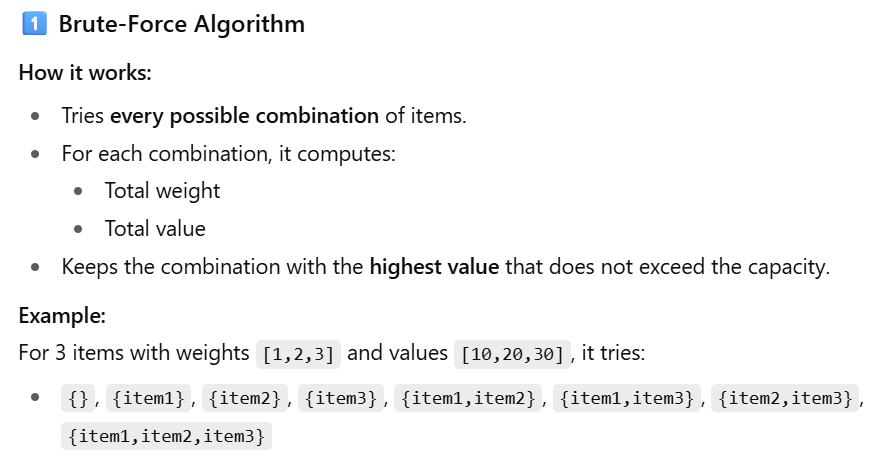

In [1]:
import itertools
import numpy as np

# Define weights, values, and maximum capacity
weights = [1, 2, 3, 2, 5, 4]
values  = [10, 15, 40, 25, 60, 50]
W = 75  # Maximum weight capacity
n = len(weights)

# ==============================
# Brute-force solution
# ==============================
max_value_bf = 0
best_combination_bf = []

# Generate all possible subsets of items
for r in range(1, n+1):
    for subset in itertools.combinations(range(n), r):
        total_weight = sum(weights[i] for i in subset)
        total_value  = sum(values[i] for i in subset)
        if total_weight <= W and total_value > max_value_bf:
            max_value_bf = total_value
            best_combination_bf = subset

print("=== Brute-force Solution ===")
print(f"Maximum value that can be carried: {max_value_bf}")
print(f"The Knapsack Items (1-based indices): {[i+1 for i in best_combination_bf]}\n")




=== Brute-force Solution ===
Maximum value that can be carried: 200
The Knapsack Items (1-based indices): [1, 2, 3, 4, 5, 6]



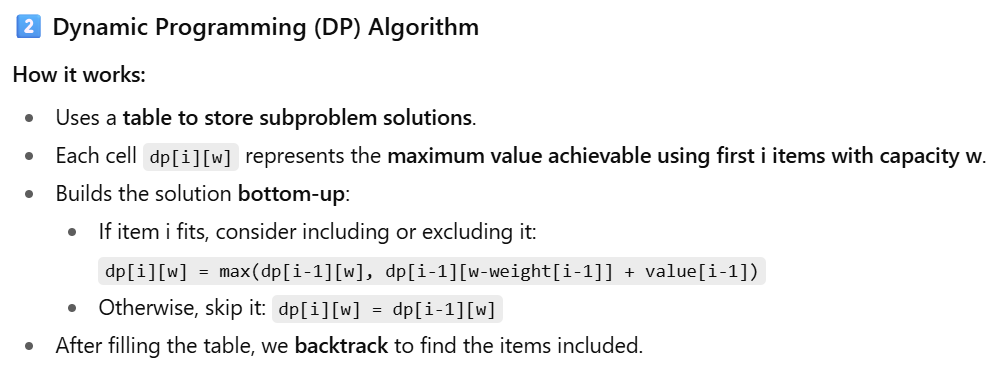

In [2]:
# ==============================
# Dynamic Programming solution
# ==============================
def knapsack_dp(weights, values, W):
    n = len(weights)
    dp = [[0 for _ in range(W + 1)] for _ in range(n + 1)]

    # Fill the DP table
    for i in range(1, n + 1):
        for w in range(1, W + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w],
                               dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    # Backtrack to find selected items
    selected_items = []
    w = W
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(i)
            w -= weights[i - 1]

    return dp[n][W], selected_items, dp

max_value_dp, selected_items_dp, dp_table = knapsack_dp(weights, values, W)

print("=== Dynamic Programming Solution ===")
print(f"Maximum value that can be carried: {max_value_dp}")
print(f"The Knapsack Items (1-based indices): {selected_items_dp[::-1]}")

print("\nDynamic Programming Table:")
for row in dp_table:
    print(row)

=== Dynamic Programming Solution ===
Maximum value that can be carried: 200
The Knapsack Items (1-based indices): [1, 2, 3, 4, 5, 6]

Dynamic Programming Table:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[0, 10, 15, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
[0